## Few Shot Prompting

**Few-shot prompting is a technique used to guide large language models (LLMs), such as GPT-3, to generate desired outputs by providing them with a few examples of input-output pairs. It involves conditioning the model using a small number of examples, known as "shots," to steer the model towards producing specific and accurate responses. This approach is particularly useful when the desired output needs to be structured in a specific way that is challenging to describe to the model using traditional methods**.

Here are the key aspects and implications of few-shot prompting based on the provided information:

**Task-Specific Conditioning**: Few-shot prompting enhances task specificity by providing the model with a limited number of examples of the desired task. This allows the model to observe instances of the task being performed, enabling it to tailor its responses or predictions more closely to the task's requirements. The specificity comes from the model's ability to use these examples to infer the finer details and nuances of the task, potentially improving its performance on unique or less common tasks.

**In-Context Learning**: Few-shot prompting can be used as a technique to enable in-context learning, where demonstrations provided in the prompt serve as conditioning for subsequent examples. By showing the model multiple examples, few-shot prompting allows for the conditioning of the model to better performance, particularly in scenarios where the output needs to be structured in a specific way that is challenging to describe to the model.

**Flexibility and Adaptability**: Few-shot prompting allows for the creation of more versatile and adaptive text generation models. It enables the creation of natural language generation models that are more flexible, adaptable, and engaging for human users, even with a limited amount of input data. This technique can lead to the development of models that can generate diverse and contextually appropriate responses based on a small set of examples.


**Examples and Shots**: Few-shot prompting involves showing the model a few explicit examples (or shots) of what is desired from it. These examples serve as guidance for the model to respond in a specific way, allowing the AI to learn from the provided examples and generate outputs that align with the demonstrated patterns.

**Use Cases**: Few-shot prompting is particularly valuable in scenarios where the desired output needs to be structured in a specific way that is difficult to describe to the model. For instance, in economic analysis, compiling specific information from local newspaper articles, or any task where the output format is challenging to articulate, few-shot prompting can be a valuable technique to guide the model towards generating the desired outputs.




In [1]:
!pip -q install openai==0.27.0 langchain huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 870.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 2.0 MB/s eta 0:00:00


**Few-shot learning is a remarkable ability that allows LLMs to learn and generalize from limited examples. Prompts serve as the input to these models and play a crucial role in achieving this feature. With LangChain, examples can be hard-coded, but dynamically selecting them often proves more powerful, enabling LLMs to adapt and tackle tasks with minimal training data swiftly**.

This approach involves using the **FewShotPromptTemplate** class, which takes in a **PromptTemplate** and a list of a few shot examples. The class formats the prompt template with a few shot examples, which helps the language model generate a better response. We can streamline this process by utilizing LangChain's **FewShotPromptTemplate** to structure the approach:

# Code template of Few Shot Prompt Template

from langchain import PromptTemplate

from langchain import FewShotPromptTemplate

# create our examples
examples = [
    {
        "query": "What's the weather like?",
        "answer": "It's raining cats and dogs, better bring an umbrella!"
    }, {
        "query": "How old are you?",
        "answer": "Age is just a number, but I'm timeless."
    }
]

# create an example template
example_template = """
User: {query}
AI: {answer}
"""

# create a prompt example from above template
example_prompt = PromptTemplate(
    input_variables=["query", "answer"],
    template=example_template
)

# now break our previous prompt into a prefix and suffix
# the prefix is our instructions
prefix = """The following are excerpts from conversations with an AI
assistant. The assistant is known for its humor and wit, providing
entertaining and amusing responses to users' questions. Here are some
examples:
"""
# and the suffix our user input and output indicator
suffix = """
User: {query}
AI: """

# now create the few-shot prompt template

few_shot_prompt_template = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    prefix=prefix,
    suffix=suffix,
    input_variables=["query"],
    example_separator="\n\n"
)
After creating a template, we pass the example and user query, and we get the results

Copy
from langchain.chat_models import ChatOpenAI
from langchain import LLMChain

# load the model
chat = ChatOpenAI(model_name="gpt-4", temperature=0.0)

chain = LLMChain(llm=chat, prompt=few_shot_prompt_template)
chain.run("What's the meaning of life?")

# Output
To live life to the fullest and enjoy the journey!
"""

## PAL

https://langchain.readthedocs.io/en/latest/modules/chains/examples/pal.html?highlight=PAL

Implements Program-Aided Language Models, as in https://arxiv.org/pdf/2211.10435.pdf.

https://reasonwithpal.com/

* In this paper, **we propose Program-Aided Language
model (PAL): a novel method that uses an LLM to read
natural language problems and generate programs as rea
soning steps, but offloads the solution step to a Python interpreter**

* **This offloading leverages an
LLM that can decompose a natural language problem into
programmatic steps, which is fortunately available using
contemporary state-of-the-art LLMs that are pre-trained on
both natural language and programming languages**

* **While natural language understanding and decomposition require LLMs, solving and reasoning can be done with the
external solver. This bridges an important gap in chain-of
thought-
like methods, where reasoning chains can be correct
but produce an incorrect answer.**



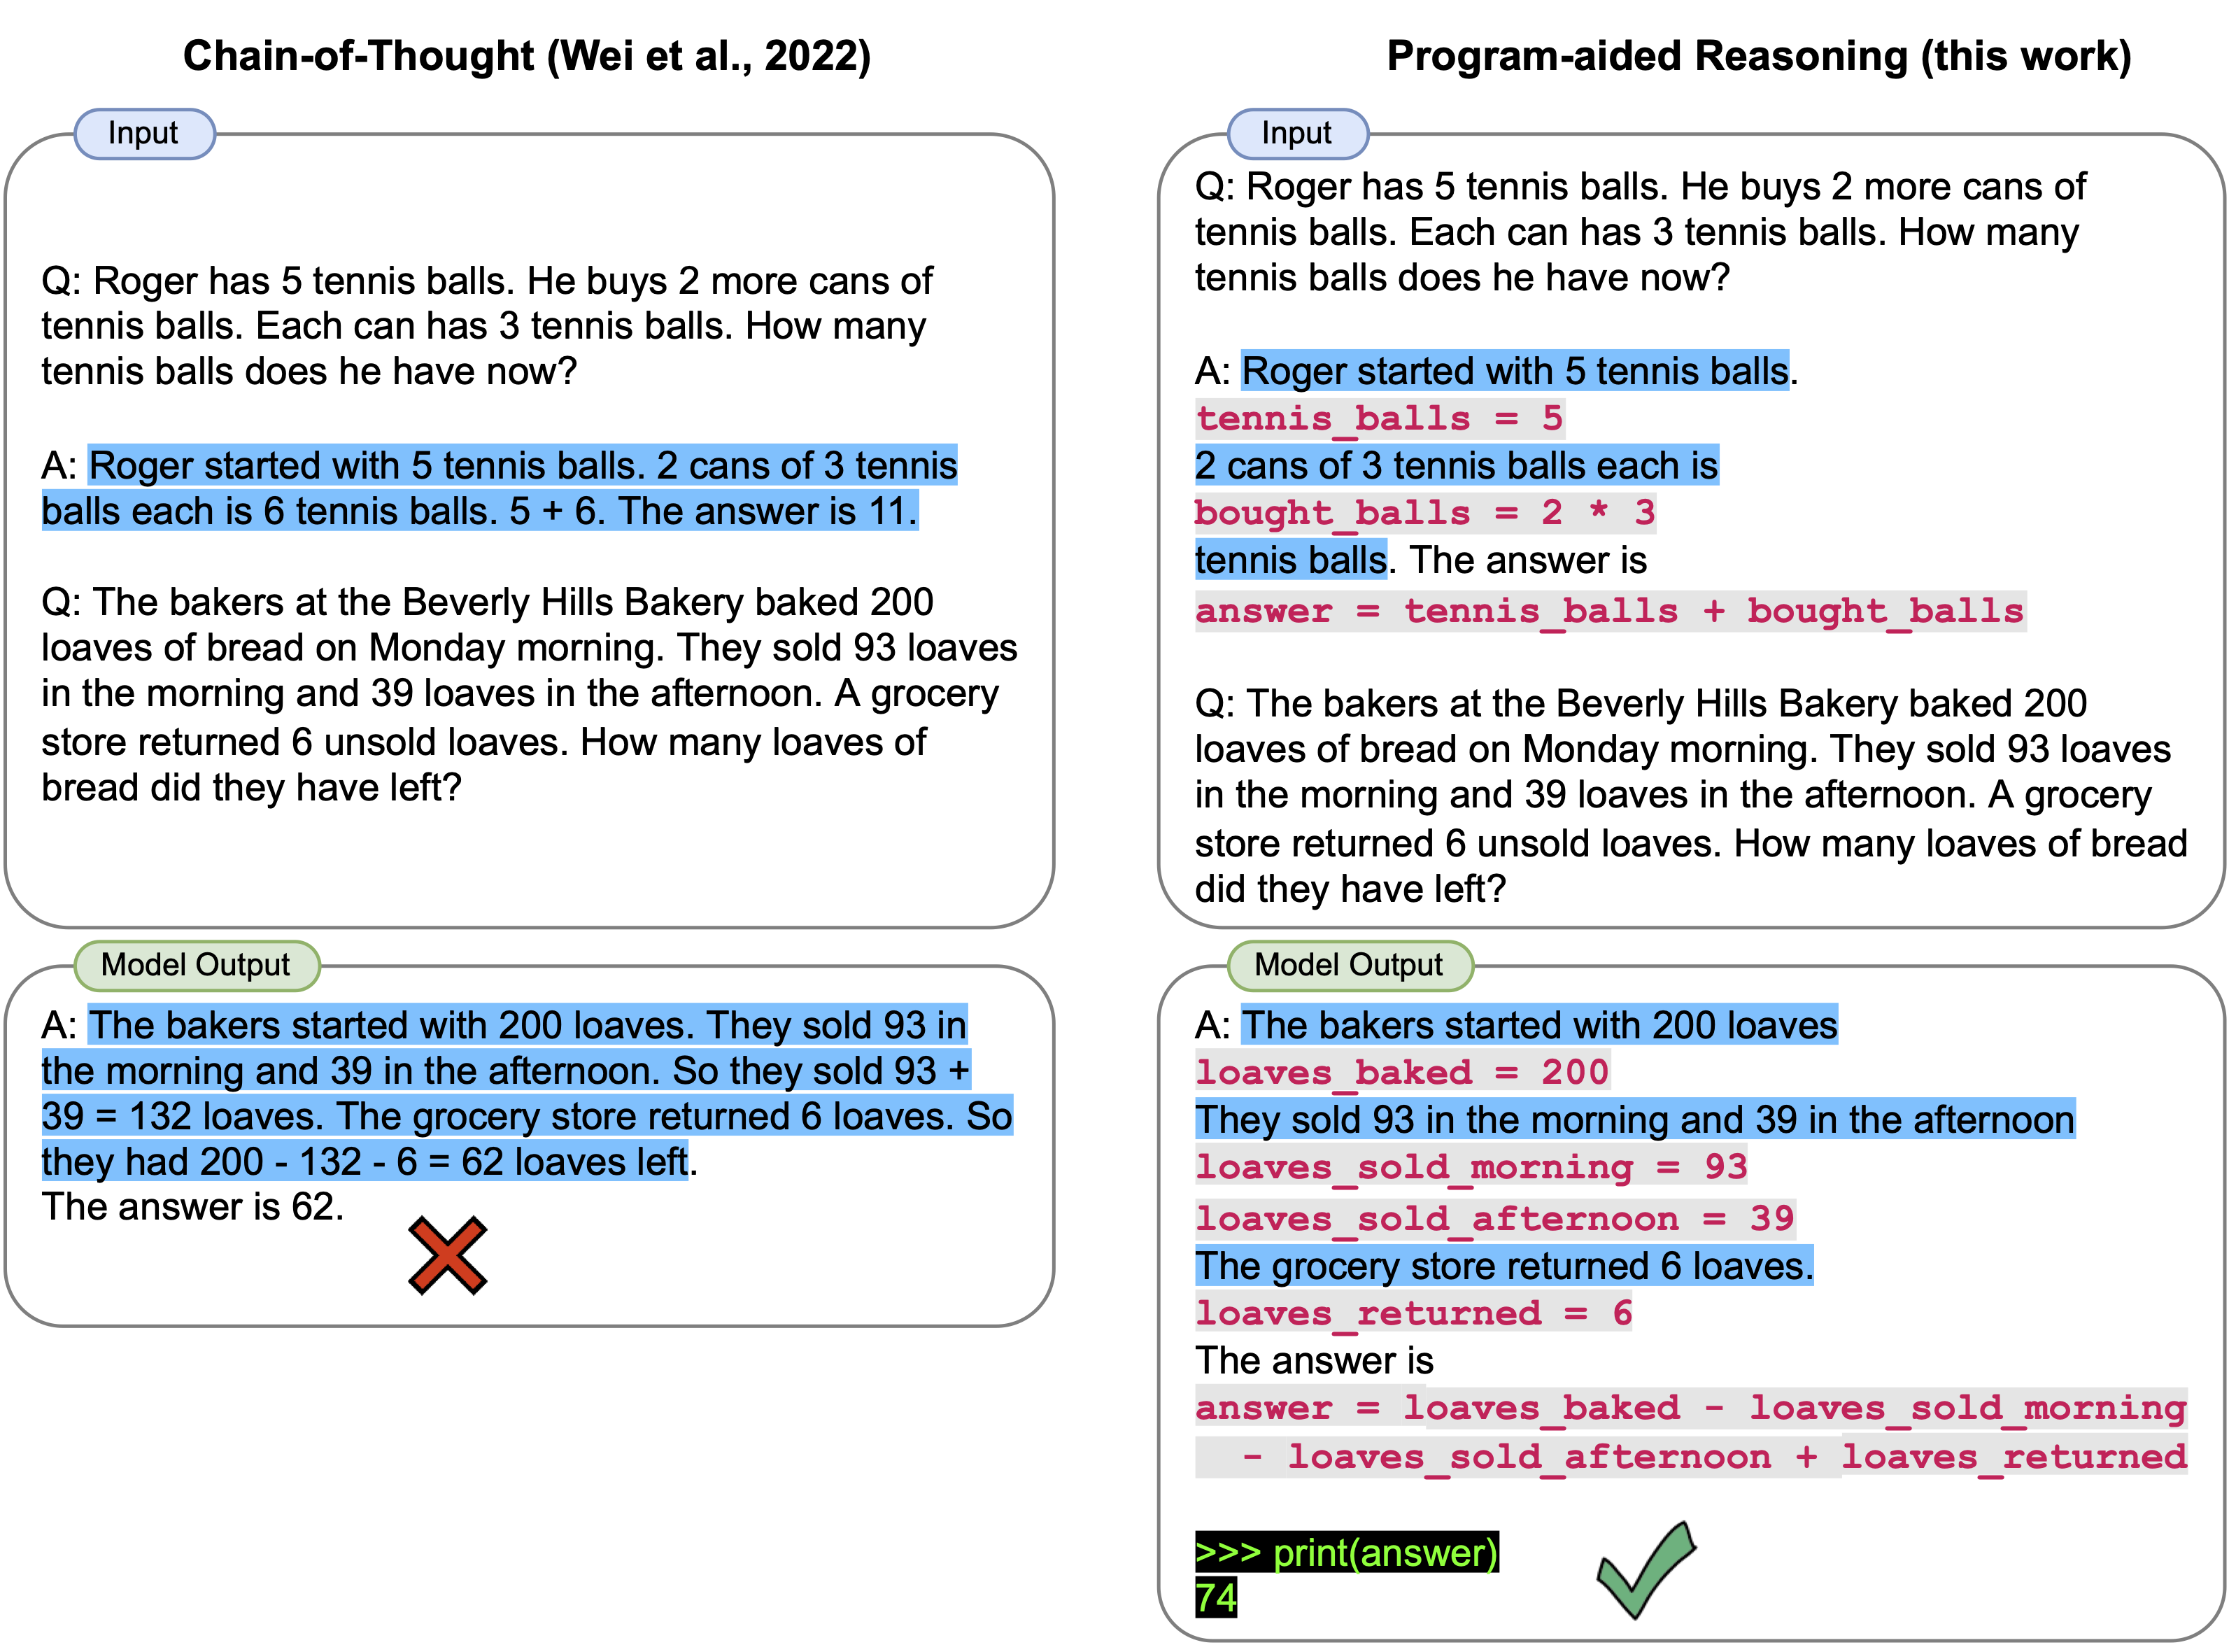

In [ ]:
import os

os.environ["OPENAI_API_KEY"] = "your-api-key"



### Performance in terms of Mathematical Reasoning


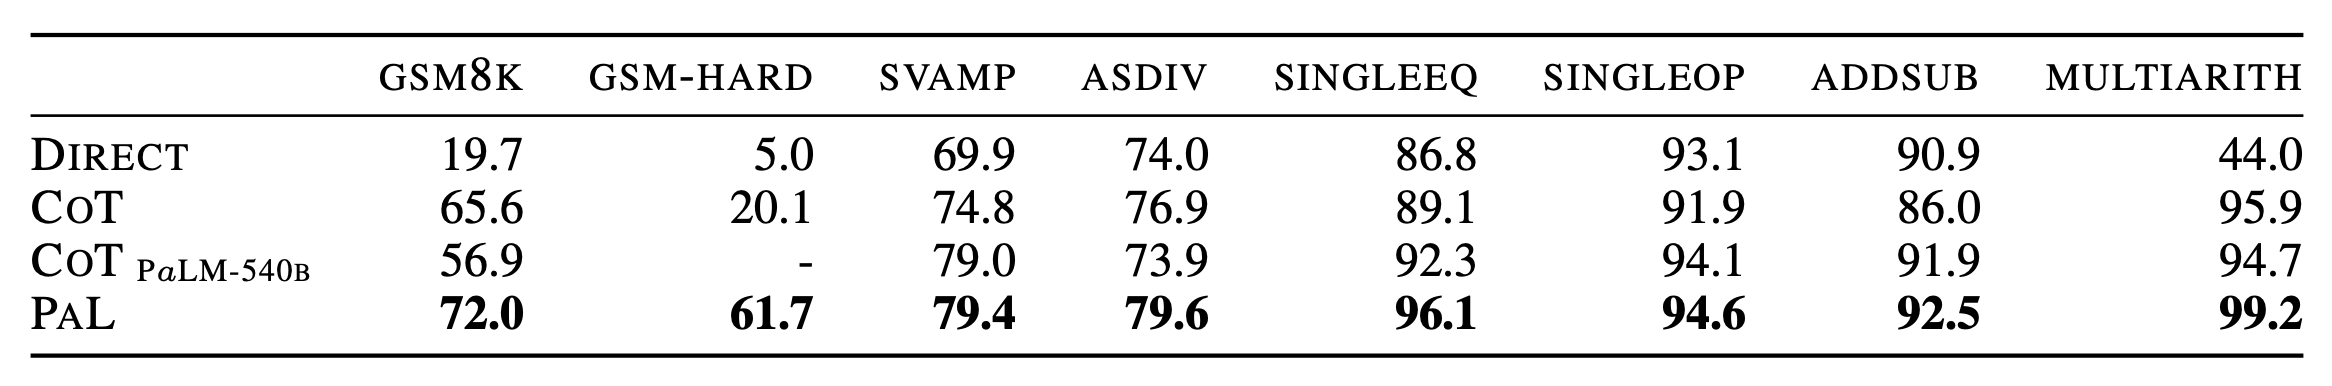


### Performance in terms of Symbolic Reasoning

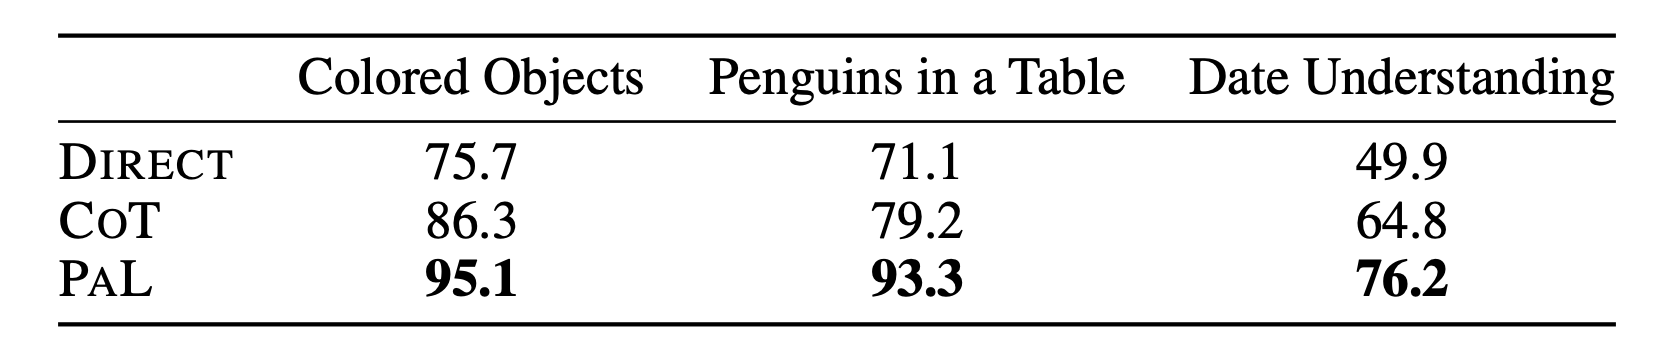

In [29]:
pip install langchain_experimental

In [30]:
from langchain_experimental.pal_chain import PALChain
from langchain import OpenAI
from langchain.chains.llm import LLMChain

In [31]:
llm = OpenAI(model_name='gpt-3.5-turbo',
             temperature=0,
             max_tokens=512)

/usr/local/lib/python3.10/dist-packages/langchain_community/llms/openai.py:249: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain_community/llms/openai.py:1070: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


## PAL - Program aided Language Model

https://www.prodigygame.com/main-en/blog/math-word-problems/

<img src="https://www.dropbox.com/s/i0wiuneh61r9u28/Screenshot%202023-03-09%20at%206.39.34%20PM.png?raw=1" alt="example image" width="300">

In [32]:
pal_chain = PALChain.from_math_prompt(llm, verbose = True)

In [53]:
question = "The cafeteria had 23 apples. \
If they used 20 for lunch and bought 6 more,\
how many apples do they have?"

In [54]:
pal_chain.run(question)



> Entering new PALChain chain...
def solution():
    """The cafeteria had 23 apples. If they used 20 for lunch and bought 6 more, how many apples do they have?"""
    apples_initial = 23
    apples_used = 20
    apples_bought = 6
    total_apples = apples_initial - apples_used + apples_bought
    result = total_apples
    return result

> Finished chain.


'9'

In [55]:
question

'The cafeteria had 23 apples. If they used 20 for lunch and bought 6 more,how many apples do they have?'

Q: Olivia has $23. She bought five bagels for $3 each. How much money does she have left?

# solution in Python:


def solution():
    """Olivia has $23. She bought five bagels for $3 each. How much money does she have left?"""
    money_initial = 23
    bagels = 5
    bagel_cost = 3
    money_spent = bagels * bagel_cost
    money_left = money_initial - money_spent
    result = money_left
    return result





Q: Michael had 58 golf balls. On tuesday, he lost 23 golf balls. On wednesday, he lost 2 more. How many golf balls did he have at the end of wednesday?

# solution in Python:


def solution():
    """Michael had 58 golf balls. On tuesday, he lost 23 golf balls. On wednesday, he lost 2 more. How many golf balls did he have at the end of wednesday?"""
    golf_balls_initial = 58
    golf_balls_lost_tuesday = 23
    golf_balls_lost_wednesday = 2
    golf_balls_left = golf_balls_initial - golf_balls_lost_tuesday - golf_balls_lost_wednesday
    result = golf_balls_left
    return result





Q: There were nine computers in the server room. Five more computers were installed each day, from monday to thursday. How many computers are now in the server room?

# solution in Python:


def solution():
    """There were nine computers in the server room. Five more computers were installed each day, from monday to thursday. How many computers are now in the server room?"""
    computers_initial = 9
    computers_per_day = 5
    num_days = 4  # 4 days between monday and thursday
    computers_added = computers_per_day * num_days
    computers_total = computers_initial + computers_added
    result = computers_total
    return result





Q: Shawn has five toys. For Christmas, he got two toys each from his mom and dad. How many toys does he have now?

# solution in Python:


def solution():
    """Shawn has five toys. For Christmas, he got two toys each from his mom and dad. How many toys does he have now?"""
    toys_initial = 5
    mom_toys = 2
    dad_toys = 2
    total_received = mom_toys + dad_toys
    total_toys = toys_initial + total_received
    result = total_toys
    return result





Q: Jason had 20 lollipops. He gave Denny some lollipops. Now Jason has 12 lollipops. How many lollipops did Jason give to Denny?

# solution in Python:


def solution():
    """Jason had 20 lollipops. He gave Denny some lollipops. Now Jason has 12 lollipops. How many lollipops did Jason give to Denny?"""
    jason_lollipops_initial = 20
    jason_lollipops_after = 12
    denny_lollipops = jason_lollipops_initial - jason_lollipops_after
    result = denny_lollipops
    return result





Q: Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?

# solution in Python:


def solution():
    """Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?"""
    leah_chocolates = 32
    sister_chocolates = 42
    total_chocolates = leah_chocolates + sister_chocolates
    chocolates_eaten = 35
    chocolates_left = total_chocolates - chocolates_eaten
    result = chocolates_left
    return result





Q: If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?

# solution in Python:


def solution():
    """If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?"""
    cars_initial = 3
    cars_arrived = 2
    total_cars = cars_initial + cars_arrived
    result = total_cars
    return result





Q: There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?

# solution in Python:


def solution():
    """There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there will be 21 trees. How many trees did the grove workers plant today?"""
    trees_initial = 15
    trees_after = 21
    trees_added = trees_after - trees_initial
    result = trees_added
    return result





Q: {question}

# solution in Python:




## GSM8k

GSM8k is Grade School Maths Questions based Dataset also used in Paper

In [57]:
question = "John buys twice as many red ties as blue ties. The red ties cost 50% more than blue ties. \
He spent $200 on blue ties that cost $40 each. How much did he spend on ties?"

In [58]:
pal_chain.run(question)



> Entering new PALChain chain...
def solution():
    """John buys twice as many red ties as blue ties. The red ties cost 50% more than blue ties. He spent $200 on blue ties that cost $40 each. How much did he spend on ties?"""
    blue_tie_cost = 40
    blue_ties_bought = 200 / blue_tie_cost
    red_tie_cost = blue_tie_cost * 1.5
    red_ties_bought = 2 * blue_ties_bought
    total_spent = (blue_ties_bought * blue_tie_cost) + (red_ties_bought * red_tie_cost)
    result = total_spent
    return result

> Finished chain.


'800.0'

In [59]:
question = "Maggie spent a quarter of her money, while Riza spent one-third of her money. \
They each had $60. How much money do the two of them have left?"

In [60]:
pal_chain.run(question)



> Entering new PALChain chain...
def solution():
    """Maggie spent a quarter of her money, while Riza spent one-third of her money. They each had $60. How much money do the two of them have left?"""
    maggie_money = 60
    riza_money = 60
    maggie_spent = maggie_money / 4
    riza_spent = riza_money / 3
    maggie_money_left = maggie_money - maggie_spent
    riza_money_left = riza_money - riza_spent
    total_money_left = maggie_money_left + riza_money_left
    result = total_money_left
    return result

> Finished chain.


'85.0'

In [61]:
question = "In November, a toy was $8186321.4112. \
In December, the price increased by 80%. In January, the price decreased by 50%. \
What was the price of the toy after it was discounted in January?"

In [62]:
pal_chain.run(question)



> Entering new PALChain chain...
def solution():
    """In November, a toy was $8186321.4112. In December, the price increased by 80%. In January, the price decreased by 50%. What was the price of the toy after it was discounted in January?"""
    toy_price_november = 8186321.4112
    toy_price_december = toy_price_november * 1.8  # 80% increase
    toy_price_january = toy_price_december * 0.5  # 50% decrease
    result = toy_price_january
    return result

> Finished chain.


'7367689.27008'

## Repeat words

In [63]:
question = "Repeat cheese seven times; every third say whiz"

In [64]:
pal_chain.run(question)



> Entering new PALChain chain...
def solution():
    """Repeat cheese seven times; every third say whiz"""
    result = ""
    for i in range(1, 8):
        if i % 3 == 0:
            result += "whiz "
        else:
            result += "cheese "
    return result.strip()

> Finished chain.


'cheese cheese whiz cheese cheese whiz cheese'

In [65]:
question = "Say the letters of the alphabet in capital letters, but only the odd ones"
#A C E G I K M O Q S U W Y"

In [66]:
pal_chain.run(question)



> Entering new PALChain chain...
def solution():
    """Say the letters of the alphabet in capital letters, but only the odd ones"""
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    odd_letters = alphabet[::2]
    result = odd_letters
    return result

> Finished chain.


'ACEGIKMOQSUWY'

## Word Math Problems

https://www.prodigygame.com/main-en/blog/math-word-problems/

In [67]:
question = "If you have 80 tickets for the fair and each ride costs 5 tickets, \
how many rides can you go on?"

In [68]:
pal_chain.run(question)



> Entering new PALChain chain...
def solution():
    """If you have 80 tickets for the fair and each ride costs 5 tickets, how many rides can you go on?"""
    tickets_total = 80
    tickets_per_ride = 5
    rides_possible = tickets_total // tickets_per_ride
    result = rides_possible
    return result

> Finished chain.


'16'

In [69]:
question = "The school has $20,000 to buy new computer equipment. If each piece of equipment costs $50,\
 how many pieces can the school buy in total?"

In [70]:
pal_chain.run(question)



> Entering new PALChain chain...
def solution():
    """The school has $20,000 to buy new computer equipment. If each piece of equipment costs $50, how many pieces can the school buy in total?"""
    budget = 20000
    cost_per_equipment = 50
    num_equipment = budget // cost_per_equipment
    result = num_equipment
    return result

> Finished chain.


'400'

In [71]:
#interpreting remainders
question = 'An Italian restaurant receives a shipment of 86 veal cutlets. If it takes 3 cutlets to make a dish, \
how many cutlets will the restaurant have left over after making as many dishes as possible?'

In [72]:
pal_chain.run(question)



> Entering new PALChain chain...
def solution():
    """An Italian restaurant receives a shipment of 86 veal cutlets. If it takes 3 cutlets to make a dish, how many cutlets will the restaurant have left over after making as many dishes as possible?"""
    cutlets_shipment = 86
    cutlets_per_dish = 3
    num_dishes = cutlets_shipment // cutlets_per_dish
    cutlets_leftover = cutlets_shipment - (num_dishes * cutlets_per_dish)
    result = cutlets_leftover
    return result

> Finished chain.


'2'

In [73]:
# mixed operations
question = "There are 235 books in a library. On Monday, 123 books are taken out. \
On Tuesday, 56 books are brought back. How many books are there now?"

In [74]:
pal_chain.run(question)



> Entering new PALChain chain...
def solution():
    """There are 235 books in a library. On Monday, 123 books are taken out. On Tuesday, 56 books are brought back. How many books are there now?"""
    books_initial = 235
    books_taken_out_monday = 123
    books_brought_back_tuesday = 56
    books_left = books_initial - books_taken_out_monday + books_brought_back_tuesday
    result = books_left
    return result

> Finished chain.


'168'

In [83]:
# percentages
question = "The school’s junior band has 10 saxophone players and 20 trumpet players. \
The school’s senior band has 18 saxophone players and 29 trumpet players. \
Which band has the higher ratio of trumpet to saxophone players?"

In [84]:
pal_chain.run(question)  # Failed in this Case



> Entering new PALChain chain...
def solution():
    """The school’s junior band has 10 saxophone players and 20 trumpet players. The school’s senior band has 18 saxophone players and 29 trumpet players. Which band has the higher ratio of trumpet to saxophone players?"""
    junior_trumpet = 20
    junior_saxophone = 10
    senior_trumpet = 29
    senior_saxophone = 18

> Finished chain.


'None'

## Some failures

In [86]:
# Time - fails
question = "If you wake up at 10:00 a.m. and it takes you 1 hour and 30 minutes to get ready and walk to school, at what time will you get to school?"


In [89]:
pal_chain.run(question)



> Entering new PALChain chain...
def solution():
    """If you wake up at 10:00 a.m. and it takes you 1 hour and 30 minutes to get ready and walk to school, at what time will you get to school?"""
    wake_up_time = 10
    get_ready_time = 1.5  # 1 hour and 30 minutes
    travel_time = 0.5  # 30 minutes
    total_time = wake_up_time + get_ready_time + travel_time
    hours = int(total_time)
    minutes = (total_time - hours) * 60
    arrival_time = f"{hours}:{int(minutes):02d}"
    return arrival_time

> Finished chain.


'12:00'

In [98]:
#ratios - fail
question = "The ratio of Jenny’s trophies to Meredith’s trophies is 18:20.\
 The difference between the numbers is 20. What are the numbers?"

In [100]:
pal_chain.run(question)  # In this Case it  is giving Correct answer



> Entering new PALChain chain...
def solution():
    """The ratio of Jenny’s trophies to Meredith’s trophies is 18:20. The difference between the numbers is 20. What are the numbers?"""
    ratio_jenny = 18
    ratio_meredith = 20
    difference = 20
    # Let the common multiplier be x
    # Jenny's trophies = 18x, Meredith's trophies = 20x
    # According to the given difference
    # 20x - 18x = 20
    # 2x = 20
    x = difference / 2
    jenny_trophies = ratio_jenny * x
    meredith_trophies = ratio_meredith * x
    result = (jenny_trophies, meredith_trophies)
    return result

> Finished chain.


'(180.0, 200.0)'

## Colored Objects


In [101]:
pal_chain = PALChain.from_colored_object_prompt(llm, verbose=True)

In [108]:
question = "On the desk, you see two blue booklets, two purple booklets, 1 purple hat \
and two yellow pairs of sunglasses.\
 If I remove all the pairs of sunglasses from the desk, how many purple items remain on it?"

In [107]:
pal_chain.run(question) # Uses List Comprehension in Code



> Entering new PALChain chain...
# Put objects into a dictionary for quick look up
objects = dict()
objects['blue booklet'] = 2
objects['purple booklet'] = 2
objects['purple hat'] = 1
objects['yellow sunglasses'] = 2

# Remove pairs of sunglasses
objects.pop('yellow sunglasses')

# Count number of purple items remaining
num_purple = sum(value for key, value in objects.items() if 'purple' in key)
answer = num_purple

> Finished chain.


'3'

## Intermediate steps

In [109]:
pal_chain = PALChain.from_colored_object_prompt(llm,
                                                verbose=True,
                                                return_intermediate_steps=True)

In [110]:
question = "On the desk, you see two blue booklets, two purple booklets,\
1 purple hat and two yellow pairs of sunglasses. \
If I remove all the pairs of sunglasses from the desk, how many purple items remain on it?"

In [111]:
result = pal_chain({"question": question})



> Entering new PALChain chain...
# Put objects into a list to record items
objects = []
objects += [('booklet', 'blue')] * 2
objects += [('booklet', 'purple')] * 2
objects += [('hat', 'purple')] * 1
objects += [('sunglasses', 'yellow')] * 2

# Remove all pairs of sunglasses from the desk
objects = [object for object in objects if object[1] != 'yellow']

# Count the number of purple items remaining
purple_items = [object for object in objects if object[1] == 'purple']
num_purple_items = len(purple_items)
answer = num_purple_items

> Finished chain.


In [112]:
result['intermediate_steps']

"# Put objects into a list to record items\nobjects = []\nobjects += [('booklet', 'blue')] * 2\nobjects += [('booklet', 'purple')] * 2\nobjects += [('hat', 'purple')] * 1\nobjects += [('sunglasses', 'yellow')] * 2\n\n# Remove all pairs of sunglasses from the desk\nobjects = [object for object in objects if object[1] != 'yellow']\n\n# Count the number of purple items remaining\npurple_items = [object for object in objects if object[1] == 'purple']\nnum_purple_items = len(purple_items)\nanswer = num_purple_items"

# Put objects into a list to record ordering
objects = []
objects += [('booklet', 'blue')] * 2
objects += [('booklet', 'purple')] * 2
objects += [('hat', 'purple')] * 1
objects += [('sunglasses', 'yellow')] * 2

# Remove all pairs of sunglasses
objects = [object for object in objects if object[0] != 'sunglasses']

# Count number of purple items
num_purple = len([object for object in objects if object[1] == 'purple'])
answer = num_purple